In [326]:
#%load_ext autoreload
#%autoreload 2
%reload_ext autoreload
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import jupyter
import pymssql
import plotly 
plotly.tools.set_credentials_file(username='perryraskin', api_key='2Qc3hhnv8Z4aEiUdajJ2')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import preprocessing
%matplotlib inline
pd.options.mode.chained_assignment = None
import glglive
import dateutil
import datetime as dt

In [231]:
glg_data = glglive.pandas_the_data('./sql/Call_Cancellations.sql')

In [232]:
glg_data.head()

,scheduled_on,app,scheduled_by,bu,total_originally_scheduled,total_rescheduled,total_cancelled
0,2016-11-01,go,cm,corporate,6,1,1
1,2016-11-01,go,cm,psf,2,1,0
2,2016-11-01,go,cm,lifeSciences,4,2,1
3,2016-11-01,go,cm,fs,63,16,9
4,2016-11-01,go-engage,rm,fs,4,1,0


In [233]:
df = pd.DataFrame(glg_data)

In [234]:
df.head()

,scheduled_on,app,scheduled_by,bu,total_originally_scheduled,total_rescheduled,total_cancelled
0,2016-11-01,go,cm,corporate,6,1,1
1,2016-11-01,go,cm,psf,2,1,0
2,2016-11-01,go,cm,lifeSciences,4,2,1
3,2016-11-01,go,cm,fs,63,16,9
4,2016-11-01,go-engage,rm,fs,4,1,0


In [235]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

In [236]:
df3['A'] = pd.Series(list(range(len(df))))

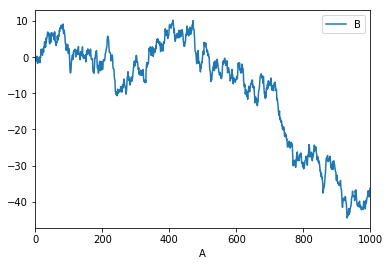

In [237]:
df3.plot(x='A', y='B')

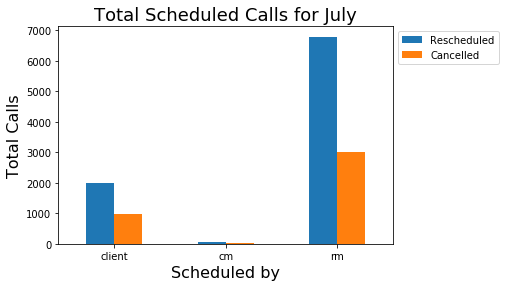

In [238]:
#-- TOTAL RESCHEDULED/CANCELLED CALLS THIS MONTH--#

# sort df by descending Total Scheduled Calls
#dfsw = df.sort_values(['Total_Scheduled_Calls'], ascending=False)

# only show data from this month
df['scheduled_on'] = pd.to_datetime(df['scheduled_on'])
mask = (df['scheduled_on'] >= '2017-07-01') & (df['scheduled_on'] <= '2017-07-31')
dfm = df.loc[mask]

# group by type of scheduler and sum amount of calls
dfg = dfm.groupby(['scheduled_by']).sum().reset_index()

# values from table
groups = [[dfg['total_rescheduled'][0], dfg['total_cancelled'][0]],
       [dfg['total_rescheduled'][1], dfg['total_cancelled'][1]],
       [dfg['total_rescheduled'][2], dfg['total_cancelled'][2]]]

group_labels = [dfg['scheduled_by'][0], dfg['scheduled_by'][1], dfg['scheduled_by'][2]]
group_metrics = ["Rescheduled","Cancelled"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar(rot=0).legend(bbox_to_anchor=(1, 1))
plt.title('Total Scheduled Calls for July', fontsize= 18)
plt.xlabel('Scheduled by', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

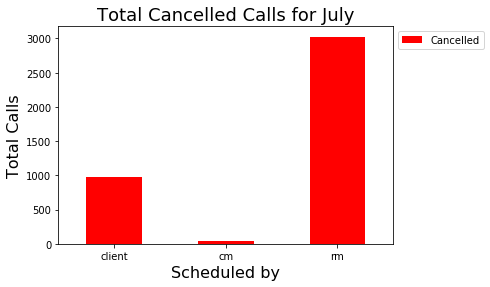

In [292]:
#-- TOTAL CANCELLED CALLS THIS MONTH--#

# sort df by descending Total Scheduled Calls
#dfsw = df.sort_values(['Total_Scheduled_Calls'], ascending=False)

# only show data from this month
df['scheduled_on'] = pd.to_datetime(df['scheduled_on'])
mask = (df['scheduled_on'] >= '2017-07-01') & (df['scheduled_on'] <= '2017-07-31')
dfm = df.loc[mask]

# group by type of scheduler and sum amount of calls
dfg = dfm.groupby(['scheduled_by']).sum().reset_index()

# values from table
groups = [[dfg['total_cancelled'][0]],
       [dfg['total_cancelled'][1]],
       [dfg['total_cancelled'][2]]]

group_labels = [dfg['scheduled_by'][0], dfg['scheduled_by'][1], dfg['scheduled_by'][2]]
group_metrics = ["Cancelled"]
data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar(rot=0, color="red").legend(bbox_to_anchor=(1, 1))
plt.title('Total Cancelled Calls for July', fontsize= 18)
plt.xlabel('Scheduled by', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

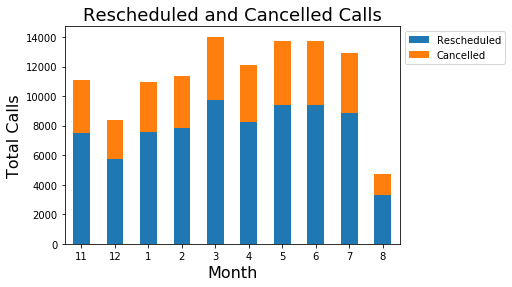

In [327]:
#-- TOTAL RESCHEDULED/CANCELLED CALLS BY MONTH--#

# Group by month
dfi = df
dfi.index = dfi["scheduled_on"]
dfg = dfi.resample('M').sum()

# Values from table
groups = [[dfg['total_rescheduled'][0], dfg['total_cancelled'][0]],
         [dfg['total_rescheduled'][1], dfg['total_cancelled'][1]],
         [dfg['total_rescheduled'][2], dfg['total_cancelled'][2]],
         [dfg['total_rescheduled'][3], dfg['total_cancelled'][3]],
         [dfg['total_rescheduled'][4], dfg['total_cancelled'][4]],
         [dfg['total_rescheduled'][5], dfg['total_cancelled'][5]],
         [dfg['total_rescheduled'][6], dfg['total_cancelled'][6]],
         [dfg['total_rescheduled'][7], dfg['total_cancelled'][7]],
         [dfg['total_rescheduled'][8], dfg['total_cancelled'][8]],
         [dfg['total_rescheduled'][9], dfg['total_cancelled'][9]]]

group_labels=[]
for i in dfg.index:
    group_labels.append(i.month)

group_metrics = ["Rescheduled", "Cancelled"]

data = pd.DataFrame(groups, index = group_labels, columns = group_metrics)

data.plot.bar(rot=0, stacked=True).legend(bbox_to_anchor=(1, 1))
plt.title('Rescheduled and Cancelled Calls', fontsize= 18)
plt.xlabel('Month', fontsize=16) #xlabel
plt.ylabel('Total Calls', fontsize=16) #ylabel

In [319]:
dfg

,total_originally_scheduled,total_rescheduled,total_cancelled
scheduled_on,,,
2016-11-30,22985,7492,3613
2016-12-31,17665,5746,2627
2017-01-31,22852,7598,3362
2017-02-28,22985,7840,3544
2017-03-31,27652,9705,4318
2017-04-30,23458,8252,3874
2017-05-31,26269,9413,4343
2017-06-30,26822,9423,4288
2017-07-31,25362,8866,4038


In [312]:
groups=[]
for i in [dfg['total_rescheduled'], dfg['total_cancelled']]:
    group_labels.append([i,i])
groups

[]

In [339]:
groups

[[7492, 3613],
 [5746, 2627],
 [7598, 3362],
 [7840, 3544],
 [9705, 4318],
 [8252, 3874],
 [9413, 4343],
 [9423, 4288],
 [8866, 4038],
 [3314, 1409]]

In [246]:
# Group by month
dfg = df.resample('M').sum()
dfg

,total_originally_scheduled,total_rescheduled,total_cancelled
1970-01-31,226769,77649,35416


In [ ]:
df_temp = df.reset_index(inplace=True)

In [249]:
df_temp = df
df_temp.index = df_temp["scheduled_on"]
df_temp.head()

,scheduled_on,app,scheduled_by,bu,total_originally_scheduled,total_rescheduled,total_cancelled
scheduled_on,,,,,,,
2016-11-01,2016-11-01,go,cm,corporate,6,1,1
2016-11-01,2016-11-01,go,cm,psf,2,1,0
2016-11-01,2016-11-01,go,cm,lifeSciences,4,2,1
2016-11-01,2016-11-01,go,cm,fs,63,16,9
2016-11-01,2016-11-01,go-engage,rm,fs,4,1,0


In [250]:
df_temp = df_temp.resample('M').sum()

In [272]:
# Group by month
labels=[]
for i in dfg.index:
    labels.append(i.month)
labels

[11, 12, 1, 2, 3, 4, 5, 6, 7, 8]

In [270]:
dfg

,total_originally_scheduled,total_rescheduled,total_cancelled
scheduled_on,,,
2016-11-30,22985,7492,3613
2016-12-31,17665,5746,2627
2017-01-31,22852,7598,3362
2017-02-28,22985,7840,3544
2017-03-31,27652,9705,4318
2017-04-30,23458,8252,3874
2017-05-31,26269,9413,4343
2017-06-30,26822,9423,4288
2017-07-31,25362,8866,4038
